## Win/Loss Betting Model


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.stats import norm, bernoulli
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from spcl_case import *
plt.style.use('fivethirtyeight')

Obtain results of teams within the past year

In [100]:
h_matches = pd.read_csv('hltv_csv/matchResults.csv').set_index('Match ID')
h_matches['Date'] = pd.to_datetime(h_matches['Date'])
h_teams = pd.read_csv('hltv_csv/teams_w_ranking.csv')
h_teams = fix_teams(h_teams.set_index('ID'))
h_players = pd.read_csv('hltv_csv/matchLineups.csv').set_index('Match ID')
h_player_names = pd.read_csv('hltv_csv/players.csv').set_index('ID')

In [101]:
MIN_DATE = dt.datetime(2017,1,1)
EVENT_SET = 'eslpl'
FILTER_TEAMS = {'eslpl': ['OpTic', 'SK', 'Cloud9', 'Liquid', 'Luminosity', 'Misfits', 'Renegades', 'Immortals', 
                    'Splyce', 'compLexity', 'Rogue', 'Ghost', 'CLG', 'NRG', 'FaZe', 'North',
                    'BIG', 'LDLC', 'mousesports', 'EnVyUs', 'NiP', 'Virtus.pro', 
                    'Astralis', 'G2', 'GODSENT', 'Heroic', 'fnatic', 'NiP', 'Heroic'],
                'mdleu': ['Virtus.pro', 'FlipSid3', 'eXtatus', 'AGO', 'Fragsters', 'Gambit', 'PRIDE', '1337HUANIA', 
                    'VITALIS', 'Epsilon', 'CHAOS', 'Crowns', 'MK', 'Japaleno', 'Not Academy', 'aAa', 'Space Soldiers',
                    'Singularity', 'Nexus', 'Invictus Aquilas', 'Spirit', 'Kinguin', 'Seed', 'Endpoint', 'iGame.com', 'TEAM5',
                    'ALTERNATE aTTaX'],
                'mdlna': ['Gale Force', 'FRENCH CANADIANS', 'Mythic', 'GX', 'Beacon', 'Torqued', 'Rise Nation', 'Denial', 'subtLe', 
                   'SoaR', 'Muffin Lightning', 'Iceberg', 'ex-Nitrious', 'Adaptation', 'Morior Invictus', 'Naventic', 'CheckSix', 'Good People'
                   , 'LFAO', 'CLG Academy', 'Ambition', 'Mostly Harmless', 'Gorilla Core', 'ex-Nitrious', 'ANTI ECO'],
                'mdlau': ['Grayhound', 'Tainted Minds', 'Kings', 'Chiefs', 'Dark Sided', 'seadoggs', 'Athletico', 'Legacy',
                    'SIN', 'Noxide', 'Control', 'SYF', 'Corvidae', 'Funkd', 'Masterminds', 'Conspiracy', 'AVANT']
               }

h_matches = h_matches[h_matches['Date'] >= MIN_DATE]
h_matches['winner'] = h_matches.apply(lambda x: x['Team 1 Score'] > x['Team 2 Score'], axis=1)
h_matches['score_diff'] = h_matches['Team 1 Score'] - h_matches['Team 2 Score']
h_matches = h_matches.join(h_players)

0.415384615385


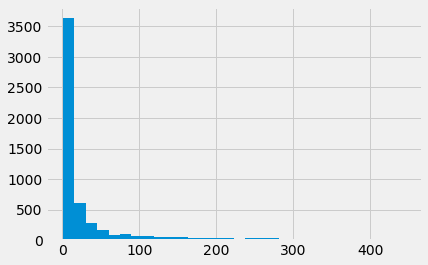

In [102]:
player_plays = h_matches[['Map',  'score_diff', 'winner'] + player_col_names].melt(value_vars=player_col_names)
player_plays = player_plays['value'].value_counts()
player_plays.hist(bins=30)
print(np.mean(player_plays > 10))
filt_players = player_plays[player_plays > 10].index

In [103]:
h_matches = h_matches[h_matches[player_col_names].isin(filt_players).all(axis=1)]
print(len(filt_players))

2295


In [104]:
player_col_names = ['Team 1 Player 1', 'Team 1 Player 2', 'Team 1 Player 3', 'Team 1 Player 4', 'Team 1 Player 5',
                 'Team 2 Player 1', 'Team 2 Player 2', 'Team 2 Player 3', 'Team 2 Player 4', 'Team 2 Player 5',]
obs = h_matches[['Map',  'score_diff', 'winner'] + player_col_names]
obs = obs[obs.Map != 'Default'].dropna(axis=0)
obs.head()

,Map,score_diff,winner,Team 1 Player 1,Team 1 Player 2,Team 1 Player 3,Team 1 Player 4,Team 1 Player 5,Team 2 Player 1,Team 2 Player 2,Team 2 Player 3,Team 2 Player 4,Team 2 Player 5
Match ID,,,,,,,,,,,,,
2307282/kinguin-vs-ldlc-esea-premier-season-23-europe-finals,Cobblestone,14,True,7356.0,8323.0,973.0,8327.0,5388.0,9545.0,7982.0,8184.0,8302.0,7166.0
2307282/kinguin-vs-ldlc-esea-premier-season-23-europe-finals,Overpass,7,True,7356.0,8323.0,973.0,8327.0,5388.0,9545.0,7982.0,8184.0,8302.0,7166.0
2307284/bravado-vs-tsm-esea-season-23-global-challenge,Mirage,8,True,7992.0,8711.0,8446.0,7993.0,8448.0,1915.0,10394.0,9258.0,8517.0,6451.0
2307285/rogue-vs-ldlc-esea-season-23-global-challenge,Overpass,-11,False,5287.0,2799.0,7834.0,1883.0,7964.0,7982.0,9545.0,8302.0,7166.0,8184.0
2307286/tainted-minds-vs-rush-esea-season-23-global-challenge,Train,10,True,10588.0,9109.0,9105.0,10586.0,10587.0,9664.0,10252.0,8756.0,9085.0,6454.0


In [105]:
players = np.sort(np.unique(np.concatenate(obs[player_col_names].values)))
maps = obs.Map.unique()
tmap = {v:k for k,v in dict(enumerate(players)).items()}
mmap = {v:k for k,v in dict(enumerate(maps)).items()}
n_players = len(players)
n_maps = len(maps)
print('Number of Players: %i ' % n_players)
print('Number of Matches: %i ' % len(h_matches))
print('Number of Maps: %i '% n_maps)

Number of Players: 2161 
Number of Matches: 14774 
Number of Maps: 8 


## Pymc Model

Determining Binary Win Loss: $wl_{m,i,j}$
$$
\omega, \tau, \sim HC(0.5) \\
R_{k} \sim N(0, \omega^2) \\
\tilde{\theta}_{m,k} \sim N(0,1) \\
R_{m,k} = R_{k} + \tau\tilde{\theta} \\
wl_{m,i,j} \sim B(p = \text{Sig}(R_{m,i}-R_{m,j})) \\
$$

and score difference: $sc_{m,i,j}$

$$
\alpha \sim Gamma(10,5) \\
\kappa_{m,i,j} = 32\text{Sig}(\alpha(R_{m,i}-R_{m,j}))-16 \\
\sigma_{m} \sim HC(0.5) \\
sc_{m,i,j} \sim N(\kappa, \sigma_{m}^2)
$$

In [107]:
import pymc3 as pm
import theano.tensor as tt

In [182]:
obs_map = obs['Map'].map(mmap).values
obs_team = obs.reset_index()[player_col_names].apply(lambda x: x.map(tmap).values, axis=1).values
obs_team_1 = obs_team[:, :5]
obs_team_2 = obs_team[:, 5:10]

with pm.Model() as rating_model:
    
    omega = pm.HalfCauchy('omega', 0.5)
    tau = pm.HalfCauchy('tau', 0.5)
    rating = pm.Normal('rating', 0, omega, shape=n_players)
    theta_tilde = pm.Normal('rate_t', mu=0, sd=1, shape=(n_maps, n_players))
    rating_map = pm.Deterministic('rating | map', rating + tau * theta_tilde).flatten()
    
    diff = tt.sum(rating_map[obs_map[:,np.newaxis]*n_players+obs_team_1], axis=1) - tt.sum(rating_map[obs_map[:,np.newaxis]*n_players+obs_team_2], axis=1)
    #p = 0.5*tt.tanh(diff)+0.5
    alpha = 0.5
    sigma = pm.HalfCauchy('sigma', 0.5)

    sc = pm.Normal('observed score diff', 16*tt.tanh(alpha*diff), sigma, observed=obs['score_diff'])
    #wl = pm.Bernoulli('observed wl', p=p, observed=obs['winner'].values)

In [174]:
with rating_model:
    approx = pm.fit(20000, method='advi')
    ap_trace = approx.sample(1000)

Average Loss = 50,061: 100%|█████████████████████████████████████████████████████| 20000/20000 [04:56<00:00, 67.49it/s]
Finished [100%]: Average Loss = 50,060


In [183]:
with rating_model:
    trace = pm.sample(1000, n_init=20000, init='jitter+adapt_diag', nuts_kwargs={'target_accept': 0.90, 'max_treedepth': 14}, tune=550) # tune=1000, nuts_kwargs={'target_accept': 0.95}

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████████████████████████████████████████████████████████████████████████| 1550/1550 [10:34<00:00,  2.44it/s]


{' NiKo': [0.92079792750436518, 0.21534982783384291],
 ' Snax': [0.34970457028533769, 0.22711198167774974],
 ' Stewie2K': [0.63832823333962196, 0.21614941818823846],
 ' coldzera': [0.70874778384271397, 0.24154337164998285],
 ' es3tag': [0.41296896184106502, 0.19724899014732411],
 ' felps': [0.68875416336279072, 0.24280301521160311],
 ' kioShiMa': [0.38203211887172939, 0.24696230247962883],
 ' pashaBiceps': [0.34875225522966669, 0.22269217813790795],
 ' seang@res': [0.24411758092727678, 0.22301338621387576]}

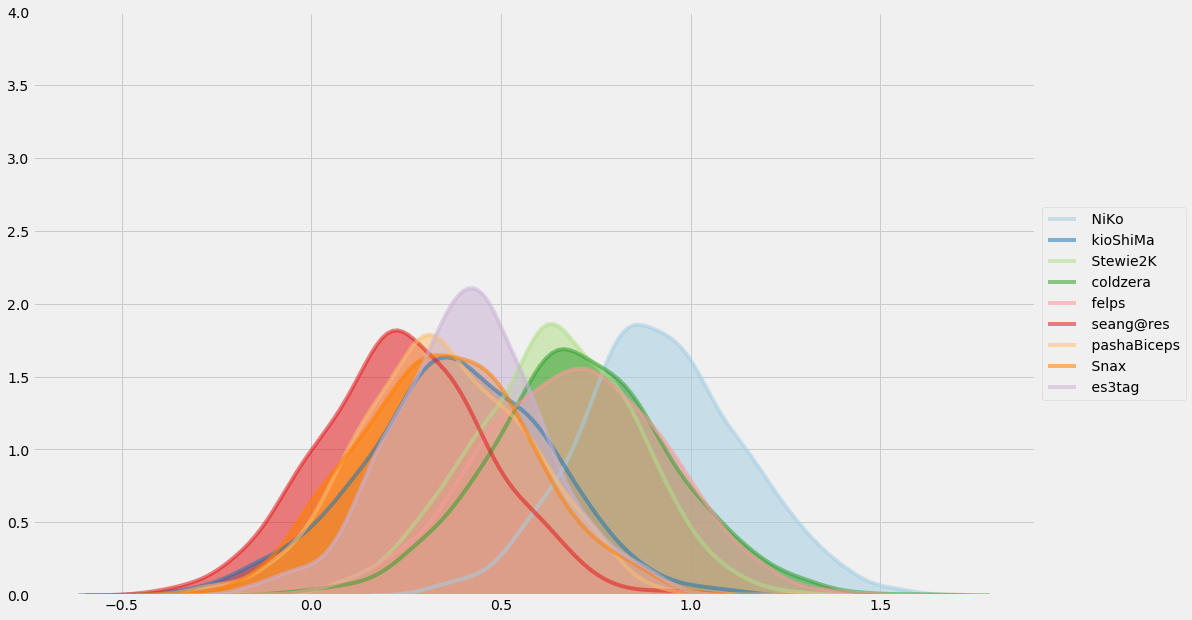

In [184]:
some_special_list = [3741, 4959, 8797, 9216, 9219, 1916, 317, 2553,8611]
filt = h_player_names.loc[some_special_list]
sns.set_palette('Paired', 10)

f, ax = plt.subplots(figsize=(16,10))
ax.set_ylim(0,4.0)
[sns.kdeplot(ap_trace['rating'][:,tmap[i]], shade=True, alpha=0.55, legend=True, ax=ax, label=v['Name']) for i,v in filt.iterrows()]
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
{v['Name']: [ap_trace['rating'][:,tmap[i]].mean(), ap_trace['rating'][:,tmap[i]].std()] for i,v in filt.iterrows()}

# Save Model

In [187]:
EVENT_SET = 'all_player_sc'
pm.backends.text.dump('saved_model/'+EVENT_SET+'/trace', trace)
np.save('saved_model/'+EVENT_SET+'/players.npy', players)
np.save('saved_model/'+EVENT_SET+'/maps.npy', maps)

## Diagnostics

In [ ]:
with rating_model:
    approx = pm.fit(15000)
    ap_trace = approx.sample(5000)

In [ ]:
print('Gelman Rubin: %s' % pm.diagnostics.gelman_rubin(trace))
print('Effective N: %s' % pm.diagnostics.effective_n(trace))
print('Accept Prob: %.4f' % trace.get_sampler_stats('mean_tree_accept').mean())
print('Percentage of Divergent %.5f' % (trace['diverging'].nonzero()[0].size/float(len(trace))))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF05CF71D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CF0DC65A58>]], dtype=object)

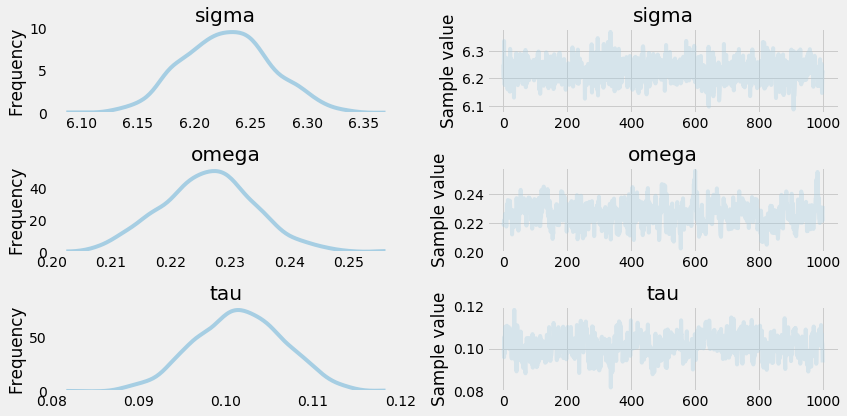

In [186]:
pm.traceplot(trace, varnames=['sigma', 'omega', 'tau'])

In [ ]:
rating_model.profile(pm.gradient(rating_model.logpt, rating_model.vars), n=100).summary()

In [ ]:
rating_model.profile(rating_model.logpt, n=100).summary()

## Moar Plots

In [ ]:
sns.set_palette('Paired', n_teams)

f, ax = plt.subplots(figsize=(16,10))
ax.set_ylim(0,2.0)
[sns.kdeplot(trace['sigma'][:,i], shade=True, alpha=0.55, legend=True, ax=ax, label=m) for i,m in enumerate(maps)]
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
f, axes = plt.subplots(n_maps,1,figsize=(12,34), sharex=True)
for m, ax in enumerate(axes):
    ax.set_title(dict(enumerate(maps))[m])
    ax.set_ylim(0,2.0)
    [sns.kdeplot(trace['rating | map'][:,m,tmap[i]], shade=True, alpha=0.55, legend=False ,
                 ax=ax, label=v['Name']) for i,v in filt.iterrows()]
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
filt

In [ ]:
i = np.where(teams==7880)
j = np.where(teams==7924)

diff = (trace['rating'][:,j] - trace['rating'][:,i]).flatten()
kappa = 32./(1+np.exp(-1.*trace['alpha']*diff))-16.
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
sns.kdeplot(kappa, ax=ax2)
sns.kdeplot(diff, ax=ax1)

## Non-MCMC Model

In [ ]:
def vec2dict(s, n_teams):
    return {
        'mu': np.array(s[:n_teams]),
        'sigma': np.array(s[n_teams:n_teams*2]),
        'beta': s[-1],
    }

def dict2vec(s):
    return s['mu'] + s['sigma'] + [s['beta']]

In [ ]:
skills_0 = dict2vec({
    'mu': [1000]*n_teams,
    'sigma': [300]*n_teams,
    'beta': 50
})

In [ ]:
from scipy.optimize import minimize


def loglike(y,p):
    return -1.*(np.sum(y*np.log(p)+(1-y)*np.log(1.-p)))

def obj(skills):
    s = vec2dict(skills, n_teams)
    mean_diff = s['mu'][obs['Team 1 ID'].map(tmap).values] - s['mu'][obs['Team 2 ID'].map(tmap).values]
    var_diff = s['sigma'][obs['Team 1 ID'].map(tmap).values]**2 + s['sigma'][obs['Team 2 ID'].map(tmap).values]**2 + skills[-1]**2
    p = 1.-norm.cdf(0., loc=mean_diff, scale = np.sqrt(var_diff))
    return loglike((obs['Team 1 ID'] == obs['winner']).values, p)


In [ ]:
obj(skills_0)

In [ ]:
opt_skill = g.x
print(opt_skill)
plots = norm.rvs(opt_skill[:5], opt_skill[5:-1], size=(2000,5))

f, ax = plt.subplots(figsize=(12,8))
[sns.kdeplot(plots[:,i], shade=True, alpha=0.55, legend=True, ax=ax, label=i) for i in range(5)]